In [0]:
#Импорт необходимых  библеотек
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import  to_categorical
from keras import initializers
import keras

#подготовим датасет
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000,28 * 28))
test_images = test_images.astype('float32')/255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


#функция,возвращающая модель с нужными нам функциями активации 
def model_mnist(initialization , activFunc):
  model = models.Sequential()
  model.add(layers.Dense(64,activation = activFunc,input_shape=(28*28,),  kernel_initializer = initialization, bias_initializer='zeros'))
  model.add(layers.Dense(10,activation ='softmax'))
  model.compile(optimizer="adagrad",loss='categorical_crossentropy',metrics=['accuracy'])
  return model

#функция, для демонстрации результата
def printRes(res):
  plt.figure(figsize=(20,10))
  for i in res:
    plt.plot(range(0,30),i.history['acc'])
  plt.title('Model acc')
  plt.ylabel('acc')
  plt.xlabel('Epoch')
  plt.legend(['rand+tanh', 'glorot+tanh',"he+sigm","glorot+sigm","rand+relu","he+relu","glorat+relu"], loc='lower right')
  plt.show()
  plt.figure(figsize=(20,10))
  for i in res:
    plt.plot(range(0,30),i.history['loss'])
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['rand+tanh', 'glorot+tanh',"he+sigm","glorot+sigm","rand+relu","he+relu","glorat+relu"], loc='lower right')
  plt.show()

#функция,возвращающая необычную модель,с 12 нейронами,и имеющую 6 скрытых слоев 
def model_mnist_interesting(initialization , activFunc):
  model = models.Sequential()
  model.add(layers.Dense(2,activation = activFunc,input_shape=(28*28,),  kernel_initializer = initialization, bias_initializer='zeros')) 
  model.add(layers.Dense(2,activation = activFunc,input_shape=(28*28,),  kernel_initializer = initialization, bias_initializer='zeros')) 
  model.add(layers.Dense(2,activation = activFunc,input_shape=(28*28,),  kernel_initializer = initialization, bias_initializer='zeros')) 
  model.add(layers.Dense(2,activation = activFunc,input_shape=(28*28,),  kernel_initializer = initialization, bias_initializer='zeros')) 
  model.add(layers.Dense(2,activation = activFunc,input_shape=(28*28,),  kernel_initializer = initialization, bias_initializer='zeros')) 
  model.add(layers.Dense(2,activation = activFunc,input_shape=(28*28,),  kernel_initializer = initialization, bias_initializer='zeros')) 
    
  model.add(layers.Dense(10,activation ='softmax'))
  model.compile(optimizer="adagrad",loss='categorical_crossentropy',metrics=['accuracy'])
  return model

#инициализируем массивы с функциями активации и функциями инициализации весов
initializationMass = ["uniform",'glorot_normal',keras.initializers.he_normal(seed=None),keras.initializers.glorot_normal(seed=None),"uniform",keras.initializers.he_normal(seed=None),'glorot_normal']
activation = ["tanh","tanh","sigmoid","sigmoid","relu","relu","relu"]

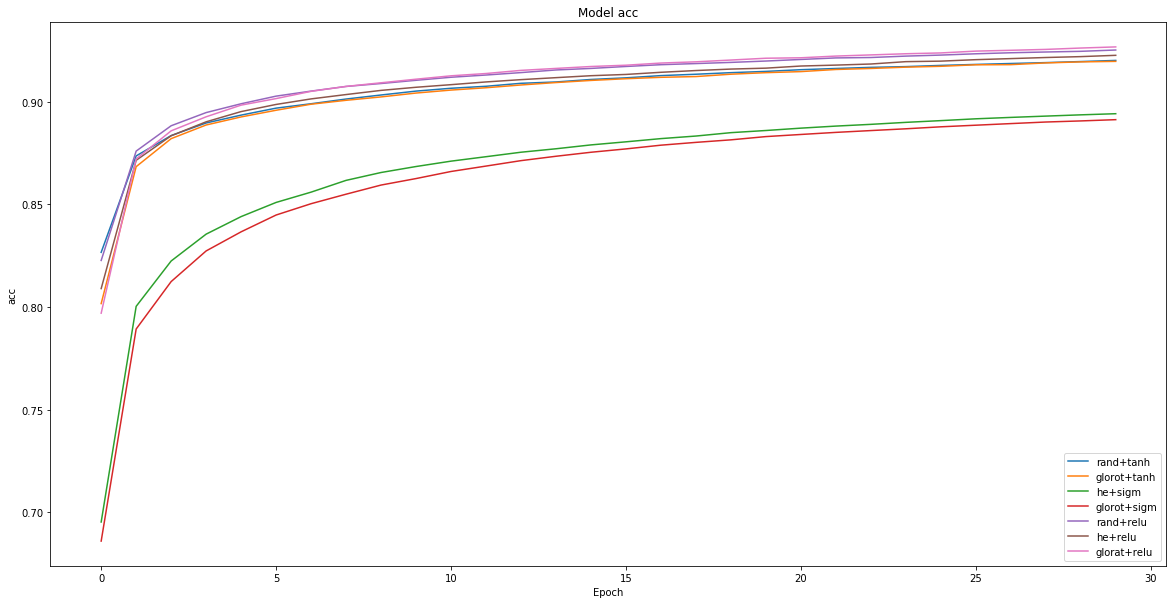

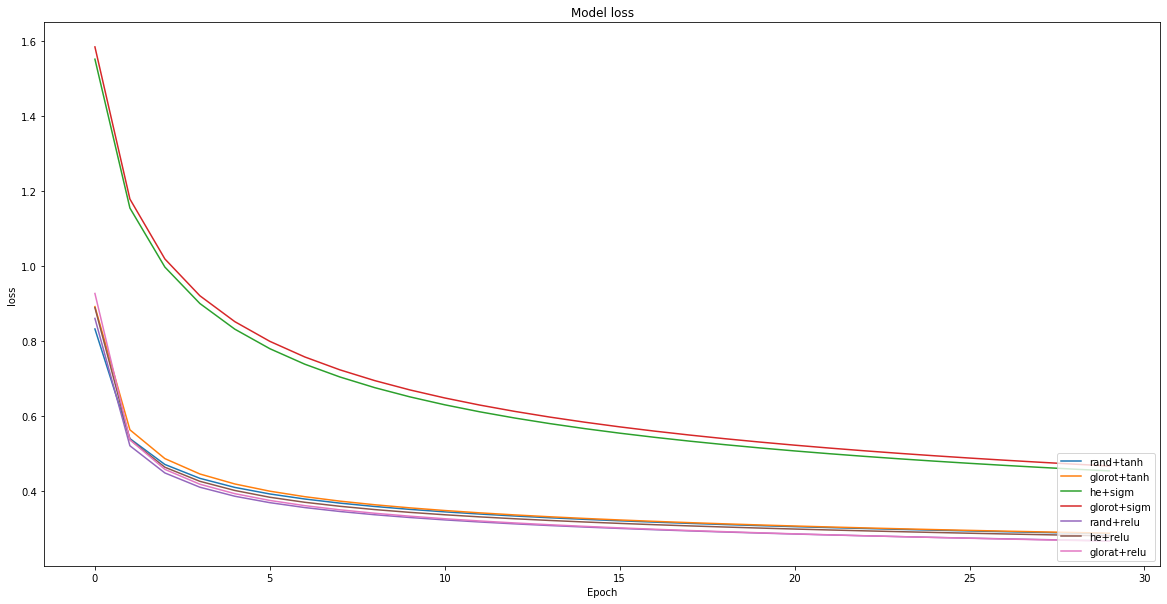

In [15]:
res =[]
for i,j in zip(initializationMass,activation):
  model = model_mnist(i,j)
  res.append(model.fit(train_images,train_labels,epochs= 30,batch_size=64,verbose=0 , validation_data=(test_images,test_labels)))
printRes(res)


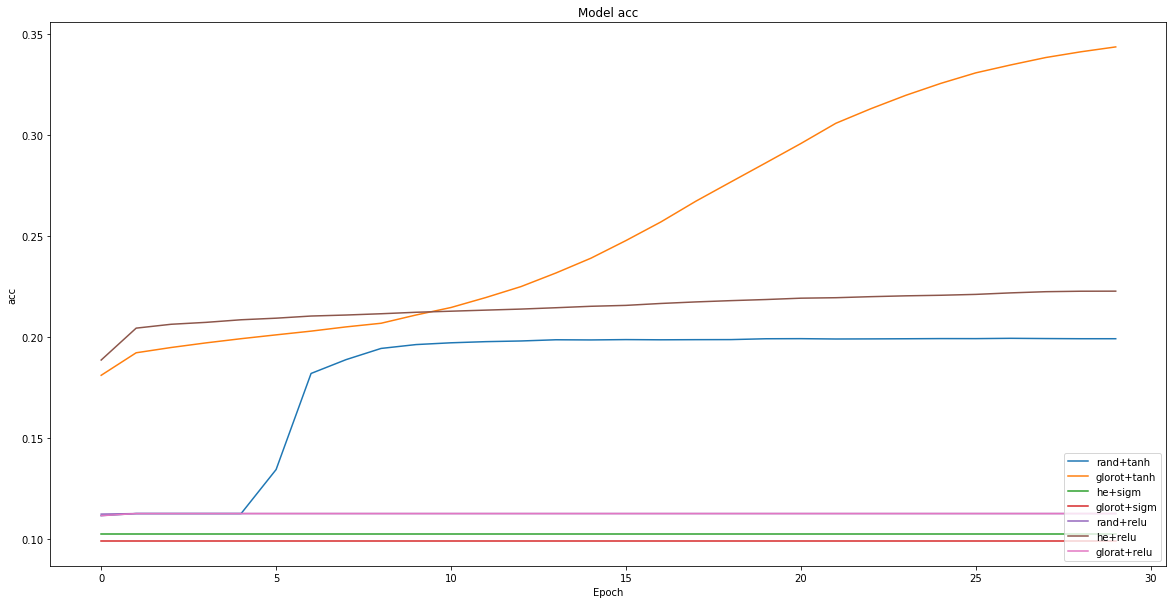

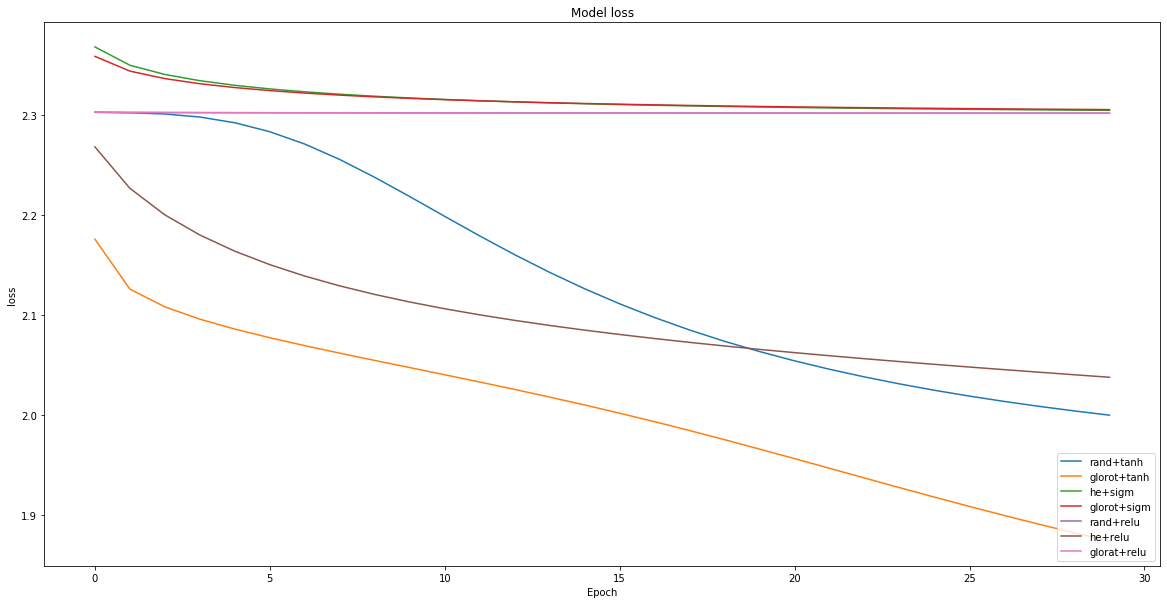

In [16]:
res =[]
initializationMass = ["uniform",'glorot_normal',keras.initializers.he_normal(seed=None),keras.initializers.glorot_normal(seed=None),"uniform",keras.initializers.he_normal(seed=None),'glorot_normal']
activation = ["tanh","tanh","sigmoid","sigmoid","relu","relu","relu"]
for i,j in zip(initializationMass,activation):
  model = model_mnist_interesting(i,j)
  res.append(model.fit(train_images,train_labels,epochs= 30,batch_size=64,verbose=0 , validation_data=(test_images,test_labels)))
printRes(res)